# 【第1回_Beginner限定コンペ】銀行の顧客ターゲティング

顧客の属性情報などから定期預金キャンペーンの反応率を予測しよう。

https://signate.jp/competitions/292

Inference編

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
submit_df = pd.read_csv('submit_sample.csv', header=None)

files = {}

files['gbm1'] = 'submit-Copy1.csv'
files['gbm2'] = 'submit-Copy2.csv'
files['gbm3'] = 'submit-Copy3.csv'
#files['gbm4'] = 'submit-Copy4.csv'
#files['gbm5'] = 'submit-Copy5.csv'

#files['rf1'] = 'submit-rf-Copy1.csv'
#files['rf2'] = 'submit-rf-Copy2.csv'
#files['rf3'] = 'submit-rf-Copy3.csv'
#files['rf4'] = 'submit-rf-Copy4.csv'
#files['rf5'] = 'submit-rf-Copy5.csv'

#files['nn'] = 'submit.csv'

In [9]:
dfs = []
for key, _file in files.items():
    df = pd.read_csv(_file, header=None, index_col=0, names=[key])
    dfs.append(df)
    
_submission = pd.concat(dfs, axis=1)
_submission.info()
_submission.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18050 entries, 0 to 18049
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gbm1    18050 non-null  float64
 1   gbm2    18050 non-null  float64
 2   gbm3    18050 non-null  float64
dtypes: float64(3)
memory usage: 564.1 KB


,gbm1,gbm2,gbm3
0,0.769405,0.785555,0.702307
1,0.666283,0.526730,0.581578
2,0.521442,0.389472,0.440025
3,0.927604,0.885206,0.911393
4,0.736592,0.703060,0.812966


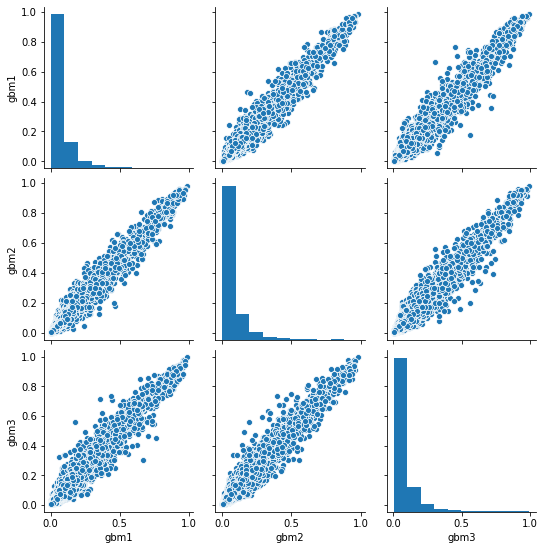

In [15]:
submission_pg = sns.pairplot(_submission)
submission_pg.savefig('submission_df.png')

In [11]:
# Rank Average
#for key in files.keys():
#    _submission[key + '_rank'] = _submission[key].rank()
    
#_submission['rank_sum'] = np.sum(_submission[col] for col in _submission.columns if '_rank' in col)
#_submission['target'] = _submission['rank_sum'] / (len(files) * _submission.shape[0])
_submission.info()
_submission.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18050 entries, 0 to 18049
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gbm1    18050 non-null  float64
 1   gbm2    18050 non-null  float64
 2   gbm3    18050 non-null  float64
dtypes: float64(3)
memory usage: 564.1 KB


,gbm1,gbm2,gbm3
0,0.769405,0.785555,0.702307
1,0.666283,0.526730,0.581578
2,0.521442,0.389472,0.440025
3,0.927604,0.885206,0.911393
4,0.736592,0.703060,0.812966


In [14]:
#submit_df[1] = _submission.iloc[:,-1]
submit_df[1] = _submission.sum(axis=1) / 3

print(submit_df.head())

submit_df.to_csv('submit_ensemble.csv', header=False, index=False)

   0         1
0  0  0.752422
1  1  0.591530
2  2  0.450313
3  3  0.908068
4  4  0.750873
